In [2]:
from run import run_game
final_game = run_game('initial_state.txt')

print(final_game.min_player_visited_nodes)
print(final_game.max_player_visited_nodes)

TypeError: run_game() missing 2 required positional arguments: 'max_player_strategy' and 'min_player_strategy'

In [1]:
import threading
from strategy import GameStrategy, PlayerStrategy
from run import run_game

# Define a function to run the game and store the result
def run_game_and_store_result(init_game_state_filename, max_player_strategy, min_player_strategy, prune, sort, max_depth=3, result_array=None):
    game_result = run_game(init_game_state_filename, max_player_strategy, min_player_strategy, max_depth, False, prune, sort)
    if result_array is not None:
        result_array.append(game_result)

# Create an array to store the game results
game_results = []

# Define the arguments for the run_game function
init_game_state_filename = 'initial_state.txt'
max_player_strategy = GameStrategy(True, PlayerStrategy.EARLY_GAME_CONQUER_CENTER, PlayerStrategy.MIDDLE_GAME_MOVE_DIAGONAL, PlayerStrategy.END_GAME_FILL_FROM_END)
min_player_strategy = GameStrategy(False, PlayerStrategy.EARLY_GAME_CONQUER_CENTER, PlayerStrategy.MIDDLE_GAME_MOVE_DIAGONAL, PlayerStrategy.END_GAME_FILL_FROM_END)

thread_no_prune_no_sort = threading.Thread(target=run_game_and_store_result, args=(init_game_state_filename, max_player_strategy, min_player_strategy, False, False), kwargs={"max_depth": 3, "result_array": game_results})
thread_prune_no_sort = threading.Thread(target=run_game_and_store_result, args=(init_game_state_filename, max_player_strategy, min_player_strategy, True, False), kwargs={"max_depth": 3, "result_array": game_results})
thread_prune_sort = threading.Thread(target=run_game_and_store_result, args=(init_game_state_filename, max_player_strategy, min_player_strategy, True, True), kwargs={"max_depth": 3, "result_array": game_results})

threads = [thread_no_prune_no_sort, thread_prune_no_sort, thread_prune_sort]

for thread in threads:
    thread.start()
    # thread = threading.Thread(target=run_game_and_store_result, args=(init_game_state_filename, max_player_strategy, min_player_strategy), kwargs={"max_depth": 2, "result_array": game_results})
    # thread.start()
    # threads.append(thread)

# Wait for all threads to finish
for thread in threads:
    thread.join()

Player: MAX [1] | Turn: 1 | Move: 1
Evaluation: -106, nodes count: 2372
Player: MAX [1] | Turn: 1 | Move: 1
Evaluation: -106, nodes count: 2450
Player: MIN [2] | Turn: 1 | Move: 2
Evaluation: 106, nodes count: 2414
Player: MIN [2] | Turn: 1 | Move: 2
Evaluation: 106, nodes count: 5186
Player: MAX [1] | Turn: 2 | Move: 3
Evaluation: -100, nodes count: 5314
Player: MAX [1] | Turn: 2 | Move: 3
Evaluation: -100, nodes count: 12376
Player: MIN [2] | Turn: 2 | Move: 4
Evaluation: 100, nodes count: 5926
Player: MAX [1] | Turn: 3 | Move: 5
Evaluation: -95, nodes count: 10203
Player: MIN [2] | Turn: 2 | Move: 4
Evaluation: 100, nodes count: 16366
Player: MIN [2] | Turn: 3 | Move: 6
Evaluation: 95, nodes count: 9783
Player: MAX [1] | Turn: 3 | Move: 5
Evaluation: -95, nodes count: 34323
Player: MAX [1] | Turn: 1 | Move: 1
Evaluation: -106, nodes count: 87080
Player: MAX [1] | Turn: 4 | Move: 7
Evaluation: -91, nodes count: 15026
Player: MIN [2] | Turn: 4 | Move: 8
Evaluation: 91, nodes count: 15

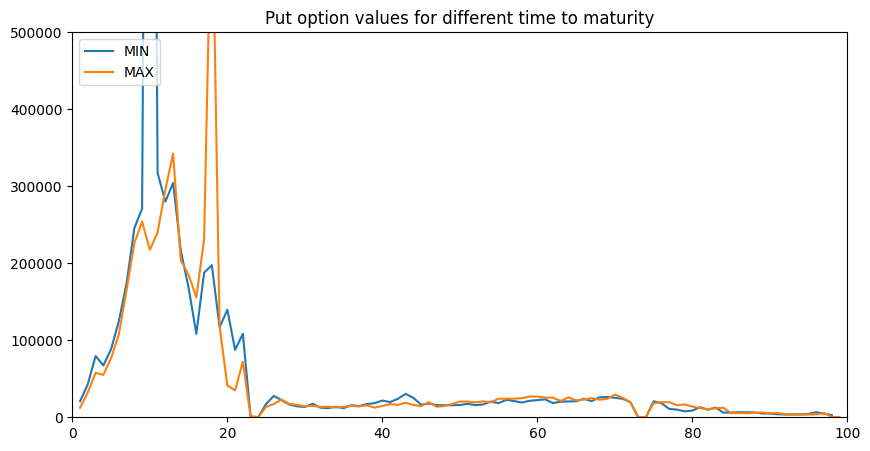

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = game_results[0].min_player_visited_nodes.keys()
y_min = game_results[0].min_player_visited_nodes.values()
y_max = game_results[0].max_player_visited_nodes.values()
# plt.plot(x, calculateBScall(x,120,0.05,0.001,0.1))
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(game_results[0].min_player_visited_nodes.keys(), game_results[0].min_player_visited_nodes.values(), label='MIN')
ax.plot(game_results[0].max_player_visited_nodes.keys(), game_results[0].max_player_visited_nodes.values(), label='MAX')
ax.set_xlim(0,100)
ax.set_ylim(0,500000)
# ax.set_xlabel('Stock price')
# ax.set_ylabel('Option value')
ax.set_title('Put option values for different time to maturity')
ax.legend(loc='upper left')

# plt.savefig('put_option.png')

# fig, ax = plt.subplots(figsize=(6,4))

# ax.plot(x, y_001, label='T=0.001')
# ax.plot(x, y_05, label='T=0.5')
# ax.plot(x, y_1, label='T=1')
# ax.set_xlim(80,150)
# ax.set_ylim(-5,75)
# ax.set_xlabel('Stock price')
# ax.set_ylabel('Option value')
# ax.set_title('Put option values for different time to maturity')
# ax.legend()

# plt.savefig('put_option_zoom.png')

plt.show()

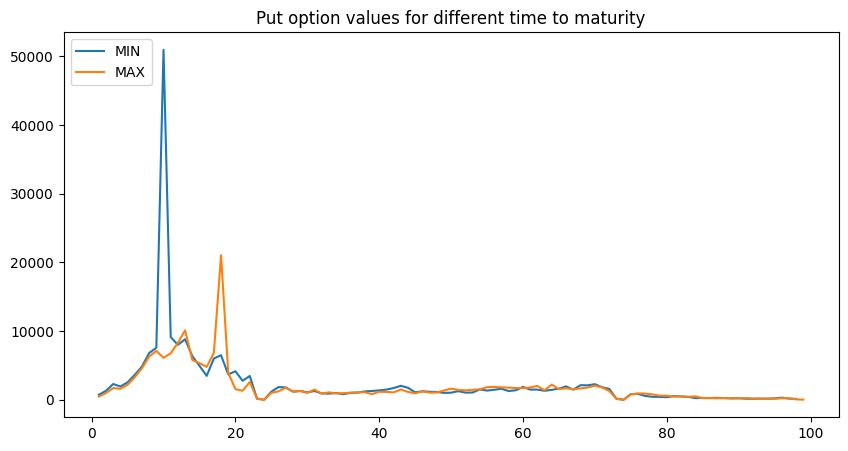

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(game_results[0].min_player_move_time.keys(), game_results[0].min_player_move_time.values(), label='MIN')
ax.plot(game_results[0].max_player_move_time.keys(), game_results[0].max_player_move_time.values(), label='MAX')
ax.set_title('Put option values for different time to maturity')
ax.legend(loc='upper left')

plt.show()

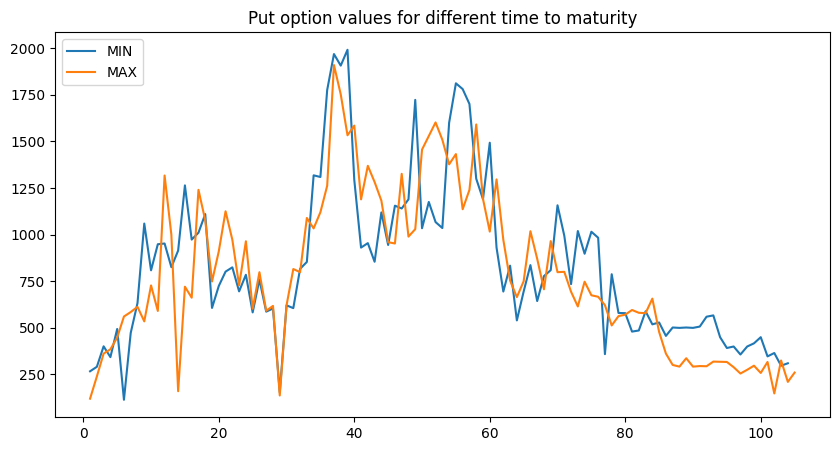

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(game_results[0].min_player_visited_nodes.keys(), game_results[0].min_player_visited_nodes.values(), label='MIN')
ax.plot(game_results[0].max_player_visited_nodes.keys(), game_results[0].max_player_visited_nodes.values(), label='MAX')
ax.set_title('Put option values for different time to maturity')
ax.legend(loc='upper left')

plt.show()